Jianan He | jiananj.he@gmail.com | 0433752740

## Table of contents
* [1.Constructors’ success based on championship season wins](#Task_1)
* [2.Drivers’ success based on race wins](#Task_2)
* [3.Risks associated with race tracks ](#Task_3)
* [4.Fastest race tracks based on lap times](#Task_4)
* [5.Recommend engineered features ](#Task_5)
* [6.Data set design ](#Task_6)

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
# Load the files
# Notice that circuits and drivers csv contain non english words that might cause encoding error
# encoding ='ISO-8859-1' ,'latin-1' and 'utf-8' can be tried

cir_df = pd.read_csv('circuits.csv')
constanding_df = pd.read_csv('constructor_standings.csv')
con_df = pd.read_csv('constructors.csv')
driver_df = pd.read_csv('drivers.csv',encoding='latin1')

# there are two 'driver Standings' files, I read the bigger one since it contain more data
dristanding_df = pd.read_csv('driver_standings.csv')
laptime_df = pd.read_csv('lapTimes.csv')
pitstops_df = pd.read_csv('pitStops.csv')
race_df = pd.read_csv('races.csv')
result_df = pd.read_csv('results.csv')
status_df = pd.read_csv('status.csv')

### 1.Carry out an analysis and report on the constructors’ success based on championship season wins<a name="Task_1"/>

In [3]:
# Join three tables togerther, there are constructors standing, constructors and race
df_cons_success = pd.merge(constanding_df[['raceId','constructorId','points']],race_df[['raceId','year']],how='left',on='raceId')
df_cons_success = pd.merge(df_cons_success,con_df[['constructorId','name']],how='left',on='constructorId')
df_cons_success.to_csv('cons_success_Q1.csv',index=False)

In [4]:
# calculate the total points each team got from one season
sum_df = df_cons_success.groupby(['year','name']).agg({'points': 'sum'}).reset_index()

In [5]:
# filter the best constructor each year
idx = sum_df.groupby(['year'])['points'].transform(max) == sum_df['points']

In [6]:
# Count the winning team in each year
df_winner=sum_df[idx]
df_winner['Teamwin_count'] = df_winner.groupby('name').cumcount() + 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


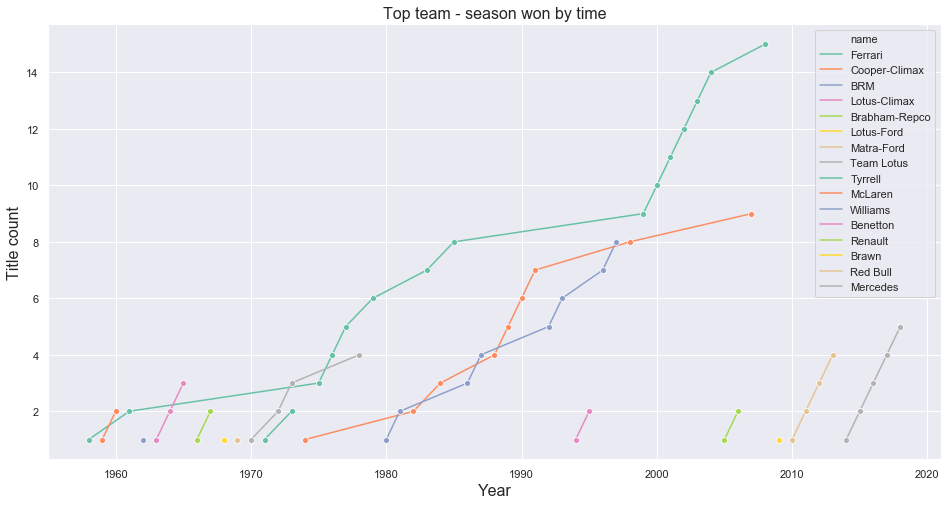

In [7]:
plt.figure(figsize=(16,8))
palette=sns.color_palette("Set2", 16)
sns.lineplot(data=df_winner, x="year", y="Teamwin_count", hue="name",palette=palette,marker="o")
plt.title('Top team - season won by time',fontsize= 16)
plt.ylabel('Title count',fontsize= 16)
plt.xlabel('Year',fontsize= 16)
plt.show()

   * Ferrari is the most successful team across the whole period, from 1958 to 2010, the team won 15 titles, especially in the early '80s from 20 century and the first 10 years in 21 century. However, in recent years, Mercedes and Red Bull took dominance.
   * Red Bull won all the titles between 2010 and 2013, Mercedes did the same in the year between 2014 to 2018.
   * Mclaren and Williams had the momentum in later '80s and '90s.
   * Between 1960 and 1980, there were 6 teams that won less than or equal to 2 championships. This is the natural considering the early time of a sport, it was a waring stage of the F1. 

**We then take a look at the total number of season won by a team across the full time**

In [8]:
# count the total number of win by grouping the team name
df_win_total = sum_df[idx].groupby(['name']).count().sort_values('year', ascending=False).reset_index()

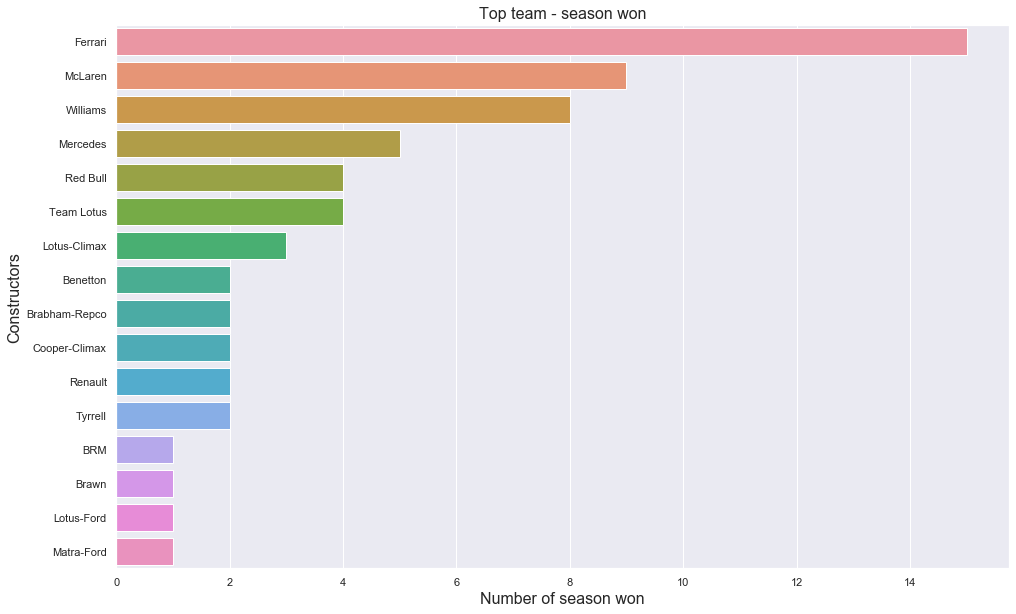

In [9]:
plt.figure(figsize=(16,10))
graph=sns.barplot(data=df_win_total, y='name', x='year')
plt.title('Top team - season won',fontsize= 16)
plt.ylabel('Constructors',fontsize= 16)
plt.xlabel('Number of season won',fontsize= 16)
plt.show()

* Ferrari is the most successful team across the whole period. It the only team that reached over 15+ titles
* McLaren and Williams are in the second group (8-10 times)
* Mercedes, Red Bull and Team Lotus are in the third group
* Noticing that only 16 teams managed to won at least one title during the entire history of F1.

   ### 2.Carry out an analysis and report on the drivers’ success based on race wins.<a name="Task_2"/>

   **First of all, we focus on how many time a driver won a race by joining the result table and driver table.
    We will use drivers' fullname to display our plot.
    Only the top 30 drivers will be illustrated.**

In [10]:
df_driver_success = pd.merge(result_df, driver_df[['driverId','forename','surname']], how='inner', on='driverId')
# create fullname of the drivers
df_driver_success['fullname'] = df_driver_success['forename'] + ' ' + df_driver_success['surname']
df_driver_success.to_csv('driver_success_Q2.csv',index=False)
# count how many races the drivers participated
df_driver_times=df_driver_success[['fullname','raceId']].groupby('fullname', as_index=False).count()

In [11]:
# count how many times a driver win the race (position=1), group by drivers' fullname
df_ds = df_driver_success[df_driver_success['position'] == 1.0].groupby('fullname', as_index=False).count().sort_values('position', ascending=False)
df_ds = pd.merge(df_ds[['fullname','position']],df_driver_times,how='inner',on='fullname')
# calculate the win rate for further comparison
df_ds['winrate'] = df_ds['position']/df_ds['raceId']

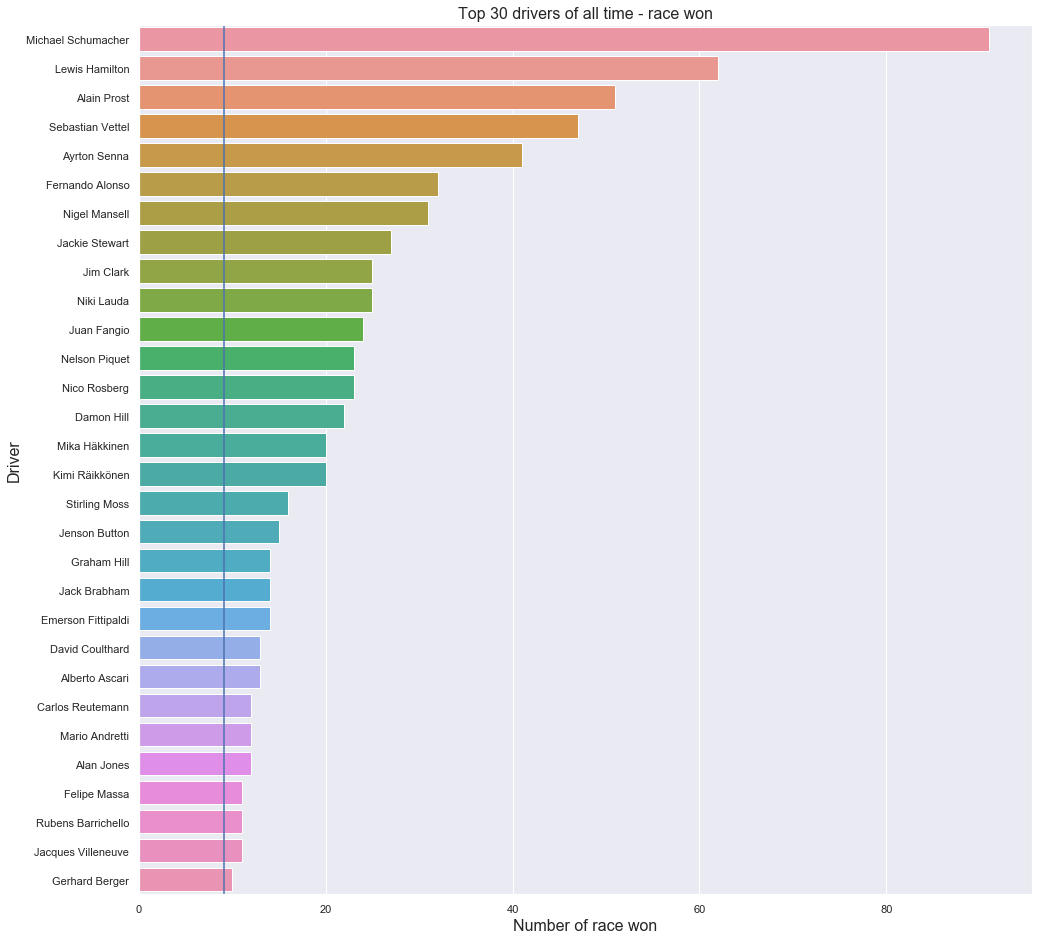

In [12]:
plt.figure(figsize=(16,16))
graph=sns.barplot(data=df_ds[:30], y='fullname', x='position')
plt.title('Top 30 drivers of all time - race won',fontsize= 16)
plt.ylabel('Driver',fontsize= 16)
plt.xlabel('Number of race won',fontsize= 16)
graph.axvline(df_ds['position'].mean())
plt.show()

* Schumacher has a dominant advantage over the other drivers, he won over 90 races through his career.
* As two active drivers, Hamilton and Vettel are two successful drivers based on race won.
* The plot already dropped all drivers that participated less than 30 races, limiting the effect from an outlier.
* The vertical line indicates the average game won by all drivers (over 30 games). There are many drivers that in the F1 big family but without won more than 5 games. This is a very competitive sport that not everyone going to achieve something.

In [13]:
df_ds=df_ds[df_ds['raceId']>30].sort_values('winrate', ascending=False)

 We then take a look on top 30 drivers on win rate who participate more than 30 races (stable drivers)

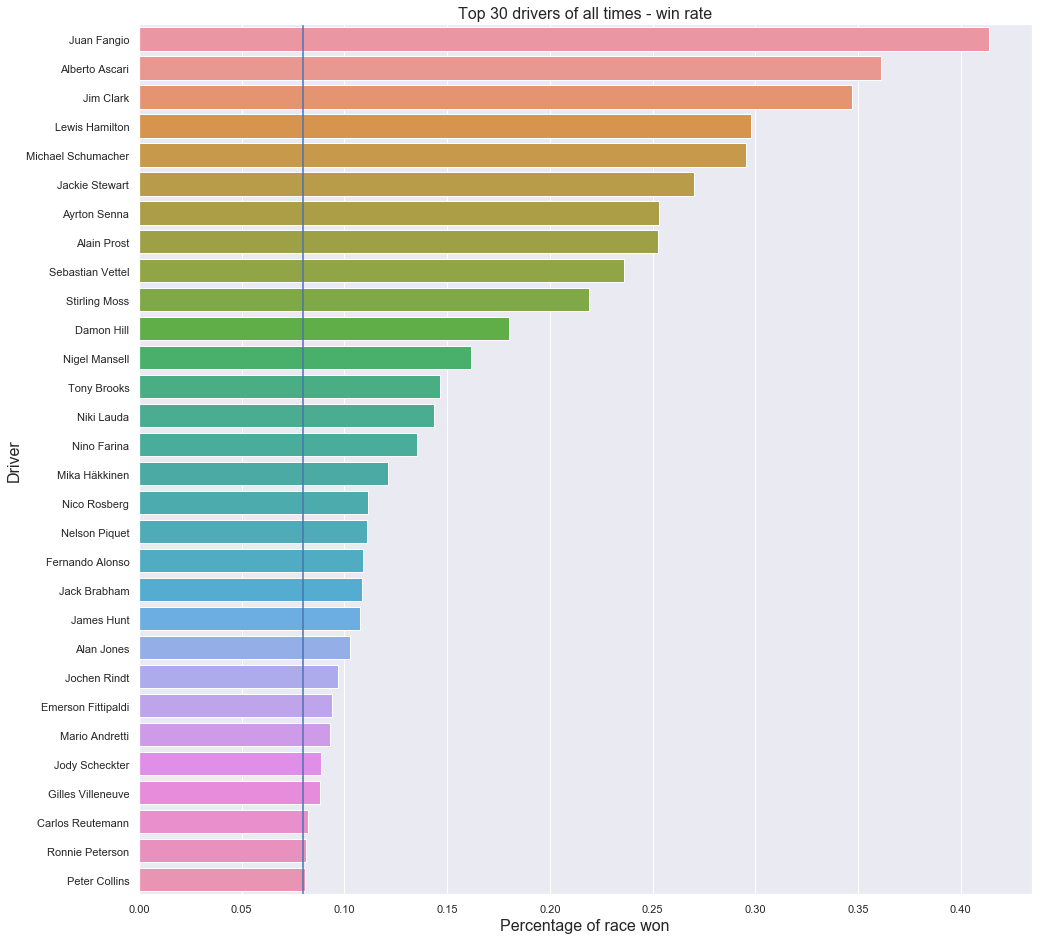

In [14]:
# The vertical line shows the average winrate among all drivers who participated more than 30 races
plt.figure(figsize=(16,16))
graph=sns.barplot(data=df_ds[:30], y='fullname', x='winrate')
plt.title('Top 30 drivers of all times - win rate',fontsize= 16)
plt.ylabel('Driver',fontsize= 16)
plt.xlabel('Percentage of race won',fontsize= 16)
graph.axvline(df_ds[df_ds['raceId']>30]['winrate'].mean())
plt.show()

* Win rate is more suitable to describe the driver how good he is. Despite a long career, Schumacher still managed to maintain his win rate (almost 30%).
* From win rate perspective, Hamilton is as good as Schumacher. Considering his age, he can expect more from his career.
* We only include the drivers who participated more than 30 games (about 2 seasons) to avoid any 'supernova'.
* Again, top 30 drivers under the situation all have a higher win rate than the average win rate of the entire population, indicating a pyramid structure of the sport. 

### 3.Carry out an analysis and report on the risks associated with race tracks based on accidents and collisions<a name="Task_3"/>

In [15]:
df_risk = pd.merge(result_df, status_df, how='inner', on='statusId')
df_risk = pd.merge(df_risk, race_df[['raceId','year','circuitId']], how='inner', on='raceId')
df_risk = pd.merge(df_risk, driver_df[['driverId','forename','surname']], how='inner', on='driverId')
df_risk = pd.merge(df_risk,cir_df[['circuitId','name']],how='inner', on='circuitId')
df_risk['fullname'] =  df_risk['forename'] + ' ' + df_risk['surname']
df_risk.to_csv('df_risk_Q3.csv',index=False)

In [16]:
df_acc=df_risk[(df_risk['status'].isin(["Collision","Accident"]))].groupby(['year']).count().reset_index()

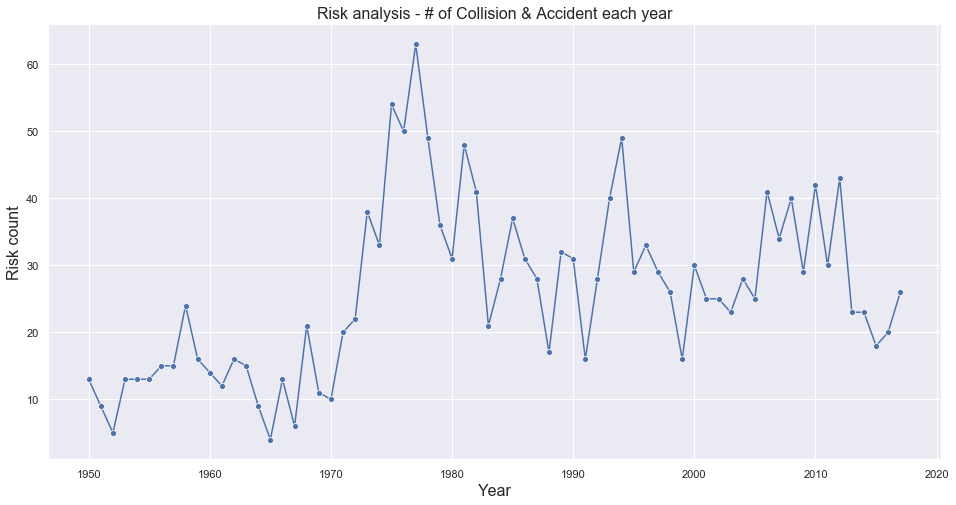

In [17]:
plt.figure(figsize=(16,8))
#palette=sns.color_palette("Set2", 16)
sns.lineplot(data=df_acc, x="year", y="resultId", marker="o")
plt.title('Risk analysis - # of Collision & Accident each year',fontsize= 16)
plt.ylabel('Risk count',fontsize= 16)
plt.xlabel('Year',fontsize= 16)
plt.show()

* Number of collision and accident reached the top around the year 1977
* After the year 1994, the number of collision and accident only vibrant in a narrow range between 20 to 40 per season
* Of course, the number of races and the circuit been pick in each season can affect the data, since some circuit are more dangerous than others.

In [18]:
# we calculate how many risky events happened in each race for all participated circuits
df_risk_race=df_risk[(df_risk['status'].isin(["Collision","Accident"]))].groupby(['name']).count().reset_index()
df_num_race=pd.merge(race_df[['circuitId','year']],cir_df[['circuitId','name']],how='inner', on='circuitId').groupby('name').count().reset_index()
risk_percir=pd.merge(df_risk_race[['name','resultId']],df_num_race[['year','name']],how='inner', on='name')
risk_percir['risk_per_year'] = risk_percir['resultId']/risk_percir['year']

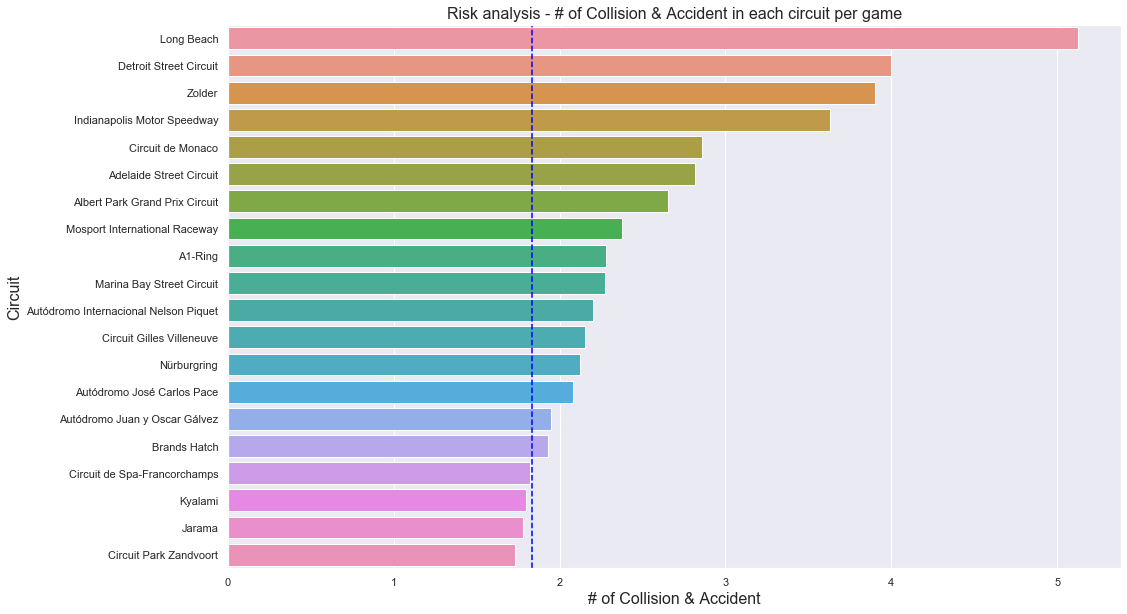

In [19]:
# Top 20 risky circuits, we only considered the circuit with more than 6 games held
plt.figure(figsize=(16,10))
data=risk_percir[risk_percir['year']>6].sort_values('risk_per_year', ascending=False)
graph=sns.barplot(data=data[:20], x="risk_per_year", y="name")
plt.title('Risk analysis - # of Collision & Accident in each circuit per game',fontsize= 16)
plt.ylabel('Circuit',fontsize= 16)
plt.xlabel('# of Collision & Accident',fontsize= 16)
graph.axvline(data['risk_per_year'].mean(), color='blue',linestyle ="--")
plt.show()

* We only include those circuits with more than 6 games.
* Long Beach is the most dangerous circuit regarding the number of collision and accident, more than 5 times in each race averagely.
* The top 4 listed circuits are most likely out of the F1 circle. The number of collision and accident could be a factor.

In [20]:
df_risk_driver=df_risk[(df_risk['status'].isin(["Collision","Accident"]))].groupby(['fullname']).count().reset_index()

In [21]:
# We calculate the percentage of race that each driver finished with collision & accident
df_risk_driver=pd.merge(df_risk_driver[['fullname','resultId']],df_driver_times[['fullname','raceId']],how='inner', on='fullname')
df_risk_driver['risk_driver'] = df_risk_driver['resultId']/df_risk_driver['raceId']

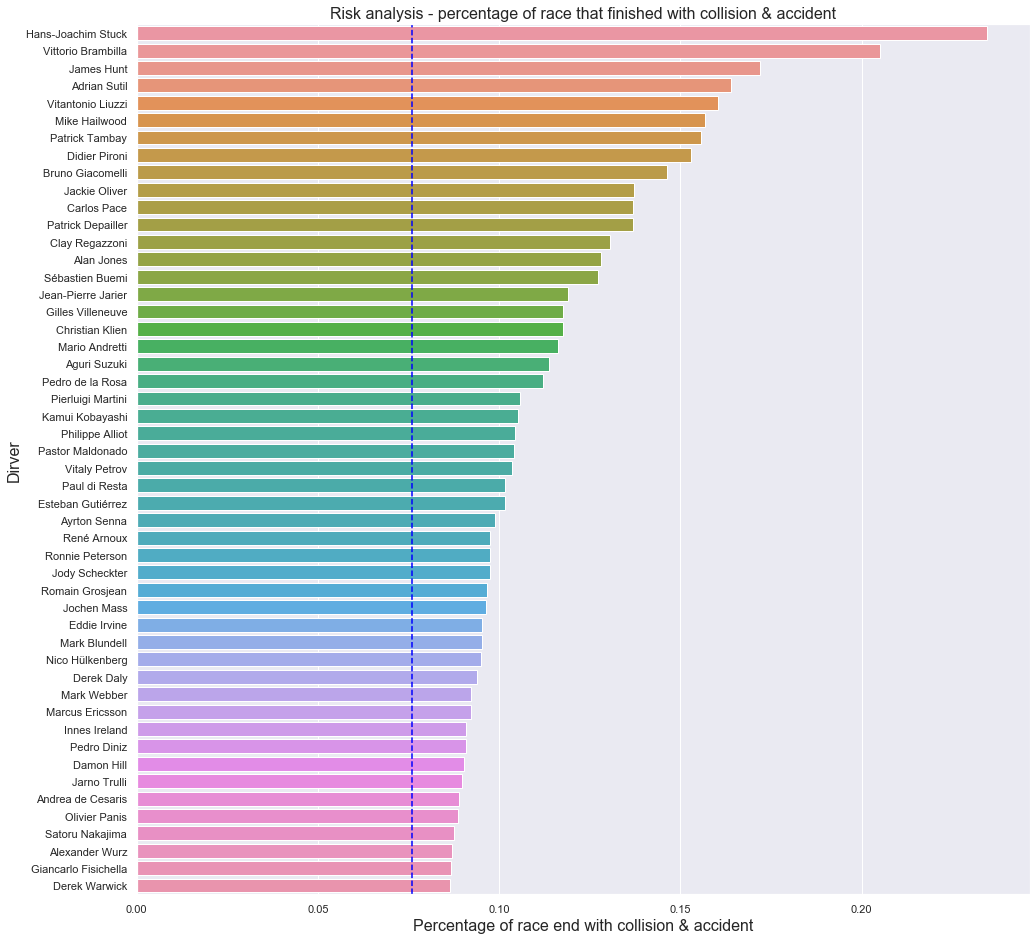

In [22]:
# Top 20 risky drivers who participated more than 50 races
plt.figure(figsize=(16,16))
data=df_risk_driver[df_risk_driver['raceId']>50].sort_values('risk_driver', ascending=False)
graph=sns.barplot(data=data[:50], x="risk_driver", y="fullname")
plt.title('Risk analysis - percentage of race that finished with collision & accident',fontsize= 16)
plt.ylabel('Dirver',fontsize= 16)
plt.xlabel('Percentage of race end with collision & accident',fontsize= 16)
graph.axvline(data['risk_driver'].mean(), color='blue',linestyle ="--")
plt.show()

* Selected drivers with more than 50 races. Two drivers finished their game with over 20% of collision and accident. Hans Stuck, he joined F1 when he was 51, this might explain the high percentage of accident.Vittorio Brambilla entered F1 when he was 37, altough he is younger than Stuck, the racing enviornment between 1970 and 1980 was more competitive and more dangrous.This fact indicates there might be a relationship between age and racing finisih rate that worth for further study. 
* Average drivers have a collision and accident rate between 5% to 10%.
* Big names like Schumacher and Hamilton are not in the list. Hence the higher the unfinished rate might casue the driver to achieve less during his career.

### 4.Carry out an analysis and report on the fastest race tracks based on lap times<a name="Task_4"/>

 I noticed that perior to year 2004, there is no lap time information from the results table

In [23]:
df_laptime = pd.merge(result_df[['raceId','driverId','constructorId','rank','fastestLapTime']],race_df[['raceId','year','circuitId']], how='left', on='raceId')
df_laptime = pd.merge(df_laptime,con_df[['constructorId','constructorRef']], how='inner', on='constructorId')
df_laptime = pd.merge(df_laptime, driver_df[['driverId','forename','surname']], how='inner', on='driverId')
df_laptime = pd.merge(df_laptime,cir_df[['circuitId','name']],how='left', on='circuitId')
df_laptime['fullname'] =  df_laptime['forename'] + ' ' + df_laptime['surname']
df_laptime = df_laptime[df_laptime['fastestLapTime'].isnull() == False]
df_laptime.to_csv('df_laptime_Q4.csv',index=False)

In [24]:
# convert the string to time in second
def to_seconds(timestring):
    try:
        tmp = timestring.split(':')
        m = int(tmp[0])
        s, ms = [int(x) for x in tmp[1].split('.')]
        return 60 * m + s + ms/10
    except ValueError:
        m, s, ms = [int(x) for x in timestring.split(':')]
        return 60 * m + s + ms/10

In [25]:
df_laptime['fastestLapTime'] = df_laptime['fastestLapTime'].apply(to_seconds)

In [26]:
df_circuit_time = df_laptime.reset_index()
df_circuit_time=df_circuit_time.loc[df_circuit_time.groupby('name')['fastestLapTime'].idxmin()]

In [27]:
df_circuit_time.groupby(['fullname']).count().sort_values('raceId', ascending=False)['index']

fullname
Michael Schumacher      9
Sebastian Vettel        6
Kimi Räikkönen          5
Rubens Barrichello      3
Felipe Massa            2
Lewis Hamilton          2
Giancarlo Fisichella    1
Juan Pablo Montoya      1
Max Verstappen          1
Name: index, dtype: int64

* From the table, Schumacher once again dominated the lap time area, in 30 circuits, he holds 9 records of fastest lap time. On the other hand, Hamilton who with 30% rate to win a race, only holds 2 circuits' lap time record. This might indicate Hamilton is more conservative in the game, or it just strategy differences between the constructors.

In [28]:
df_circuit_time_year = df_laptime.reset_index()
df_circuit_time_year=df_circuit_time_year.loc[df_circuit_time_year.groupby(['name','year'])['fastestLapTime'].idxmin()]

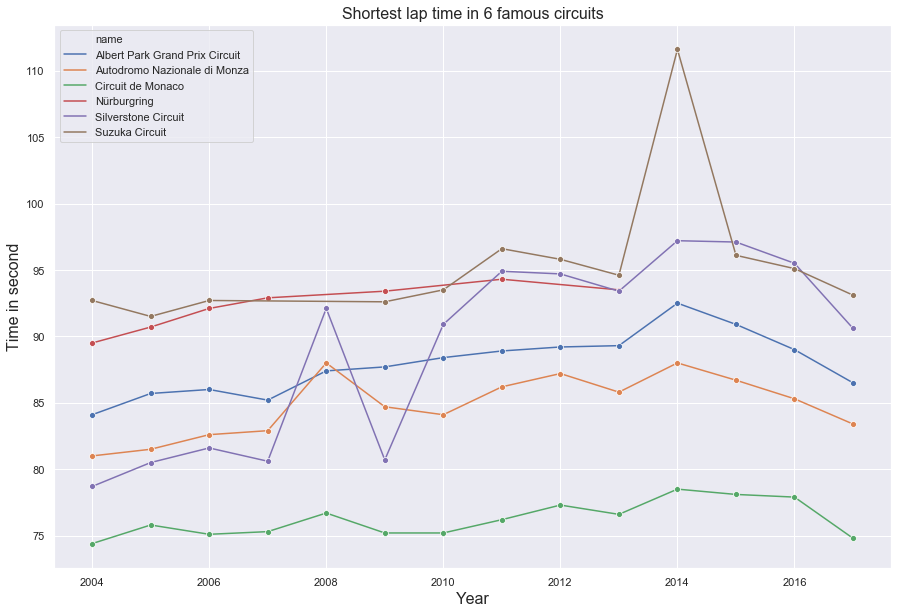

In [29]:
plt.figure(figsize=(15,10))
data = df_circuit_time_year[(df_circuit_time_year['name'].isin(["Albert Park Grand Prix Circuit","Autodromo Nazionale di Monza",
                                                                "Suzuka Circuit","Silverstone Circuit","Circuit de Monaco",
                                                                "Nürburgring"
                                                               ]))]
sns.lineplot(data=data , x="year", y="fastestLapTime", hue="name",marker="o")
plt.title('Shortest lap time in 6 famous circuits',fontsize= 16)
plt.ylabel('Time in second',fontsize= 16)
plt.xlabel('Year',fontsize= 16)
plt.show()

* Although the trend is not obvious, we still can find an increase in lap time from 2004 to 2014, following by a small decreasing trend until 2018
* In the year 2014, the displacement and revolution limit of F1 engine have been reduced to 1.6L and 15,000 rpm, respectively. This might be one of the factors that lap time had a bigger surge.

In [30]:
df_circuit_avg = df_laptime.reset_index()

In [31]:
# Calculate the average lap time for each circuit in each year
df_circuit_avg=df_circuit_avg.groupby(['name','year'])['fastestLapTime'].mean().reset_index()

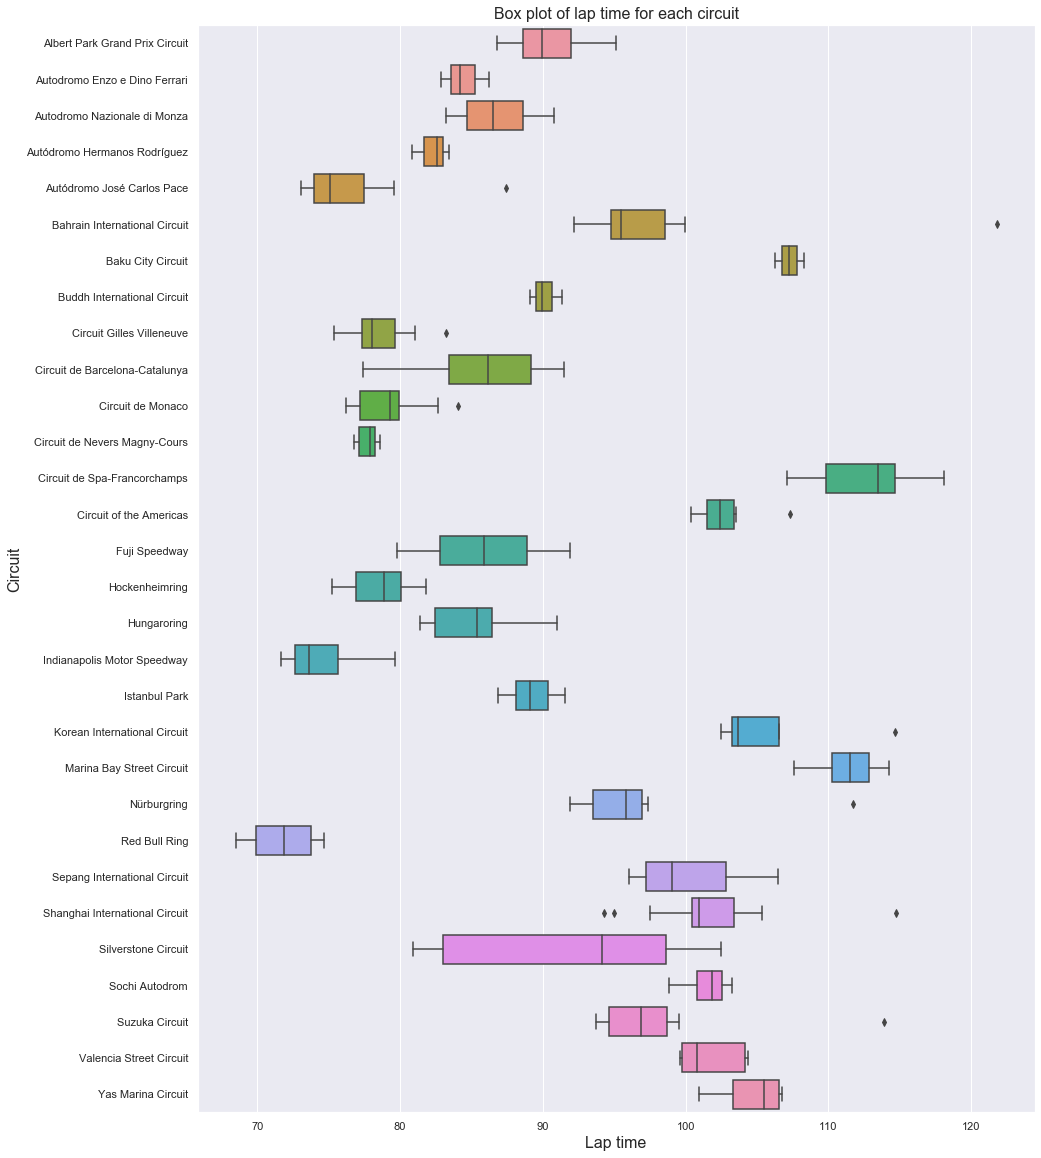

In [32]:
# Create box plot
plt.figure(figsize=(15,20))
sns.boxplot(x="fastestLapTime", y="name",
                 data=df_circuit_avg)
plt.title('Box plot of lap time for each circuit',fontsize= 16)
plt.ylabel('Circuit',fontsize= 16)
plt.xlabel('Lap time',fontsize= 16)
plt.show()

* From the box plot, we can find the fastest race tracks was in Red Bull Ring circuit. 
* Some circuits have a big variance in each year's average lap time, for example, Silverstone Circuit and Bahrain international circuit (outlier).
* Considering the limited number of data and different specification and regulation of F1 sport, the lap time will keep changing in the coming years.

### 5. Recommend engineered features to the Data Scientists for the ML model they are building. Analyse and explain why you’d think the engineered features would boost ML model performance.<a name="Task_5"/>

The ML model is to predict the constructor and driver race winners based on the historical data supported. There will be the correlation between constructor winner and driver winner.

* The streak: some drivers may have a higher chance to win in certain circuits, for example, he won last 3 out of 5 races in Monaco, then the momentum would bring him a better chance for next race in the same circuit. 


* A boolean variable of Home field: a driver may train in the same place as the race, familiar with the facility or simply be from the same country. With those reasons, he might have a higher chance to win in his home country.


* Drivers' age: It may play a role in the performance. Considering F1 is an intensive sport, drivers could have a range of 'peak time' where most racers perform well, and then that performance could decrease.


* The likelihood of a DNF（did not finish） for each driver: with our finish the race, there will be no gain from the driver or team. It can be a boolean value for each race (complex) or a number that indicates the chance of a driver.


* Pit stops: based on the average of past pit stops, we could estimate the number of pit stops per race, and its effect on performance. It can also indicate the different strategy of racing for each driver or team.


* The weather condition (external data): It could be a simple 'good' or 'bad', or much more complex with rain info and temperature added. This info will link with the adaptability of the driver under certain weather condition.


* Lap times: average or maximum lap time could be insights for race performance.


* features can be selected by applying proper methods and standards. Such as correlation in a linear model, feature importance for Tree-based classifiers and so on. 

In summary:
* The performance must be evaluated by applying the validation set for hyperparameters tuning and testing set for prediction result comparison. Several techniques can be applied to improve the model performance, such as k-fold Cross-Validation for model comparison, or regularization for the over-fitting problem. In terms of the dataset, it might worth to try the dimension reduction like PCA to avoid the curse of dimensionality. 


* Information extraction is vital for building a machine learning model. Besides engineered features, we can rely on some unsupervised learning techniques to extract information from the dataset so it can be used as input data to train our model. For example, there might be some latent groups for F1 drivers, a clustering method can be applied, following by other machine learning method like the random forest.


* F1 winner prediction is a hard topic due to the constant change of engine configuration, the scoring system as well as other regulations.

## 6.Database design<a name="Task_6"/>

* The output requests 'Combined dataset' as per the requirement. Although there are several CSV files been generated from this notebook that services as the 'dataset', a well-designed RDS is better to suit the situation. Considering the access control, ETL process, further data update as well as ad-hoc analysis requirement, an AWS RDS or cloud-based relational database platform are two applicable choices.


* The CSV files already contain primary key and related foreign keys. This might indicates the files indeed come from an RDS. The relational diagram has been attached for further reference.


* Once the database been hosted by service providers, we can use Python or other platforms to connect to the database.

![F1 database design](https://raw.githubusercontent.com/cyric90/Skill_demonstration/master/F1/F1.png)